### Logistic Regression with Python - V1.0

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv("titanic_train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In the dataset:
- 177 (~20%) age data is missing. We need to **replace** this column.
- 684 (~76%) cabin data is missing. We may need to **drop** this column.

### Data Visualization

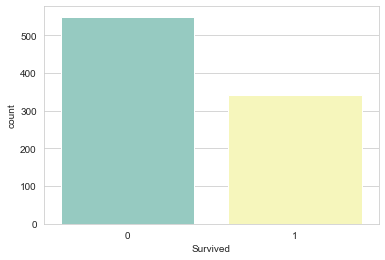

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train_data, palette="Set3")

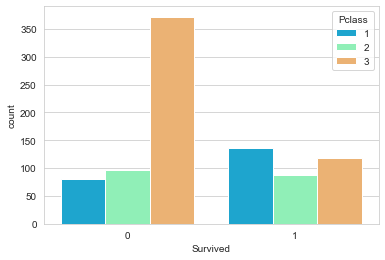

In [6]:
sns.countplot(x="Survived", hue="Pclass", data=train_data, palette="rainbow")

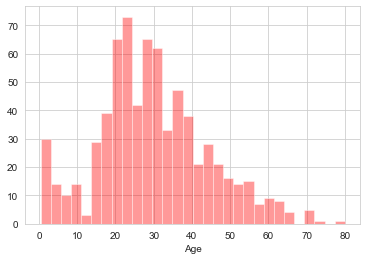

In [7]:
sns.distplot(train_data["Age"].dropna(), kde=False, color="red", bins=30)

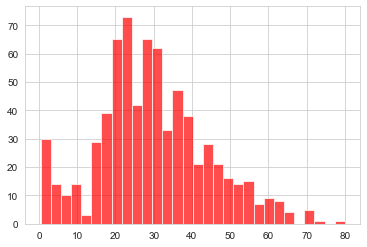

In [8]:
train_data['Age'].hist(bins=30, color="red", alpha=0.7)

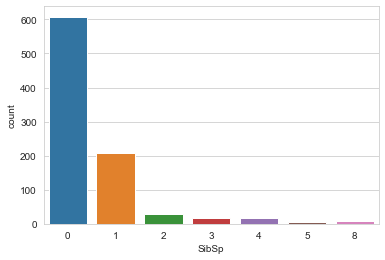

In [9]:
sns.countplot(x="SibSp", data=train_data)

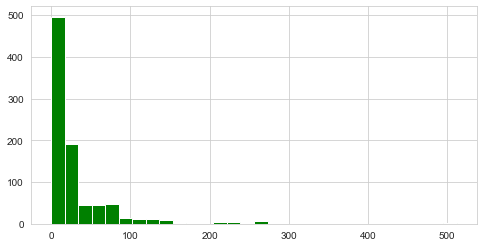

In [10]:
train_data['Fare'].hist(bins=30, color="green", figsize=(8,4))

### Data Cleaning

- Fill missing 'Age' column with average 'Age'

#### Visualization

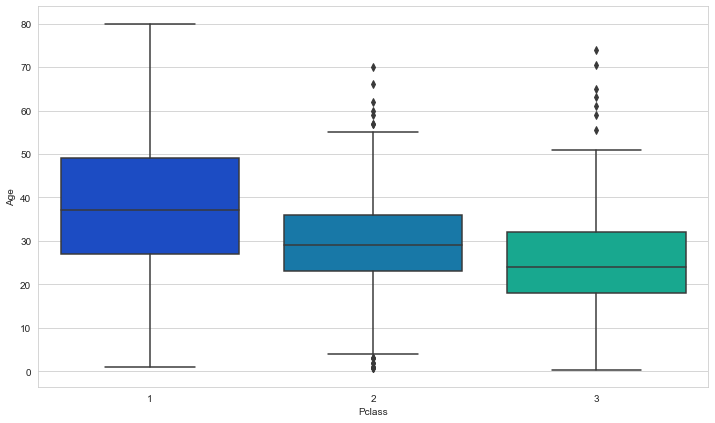

In [11]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train_data, palette='winter')

In [12]:
data1 = train_data[['Pclass', 'Age']]
data1.groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age

In [14]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

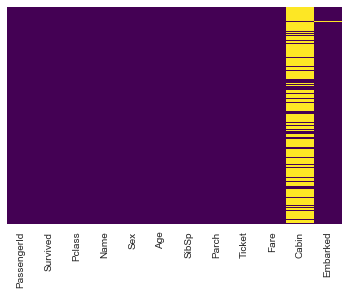

In [15]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Drop 'Cabin' Coumn

In [16]:
train_data.drop('Cabin', axis=1, inplace=True)

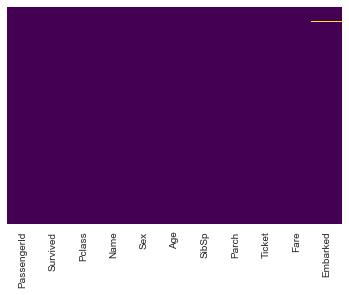

In [18]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Remove the NaN row in Embarked

In [19]:
train_data.dropna(inplace=True)

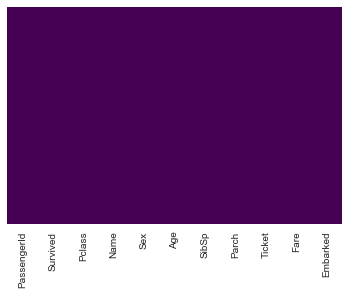

In [20]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Converting Categorical Fratures -- Sex, Embarked

In [21]:
sex = pd.get_dummies(train_data['Sex'], drop_first = True )
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True )

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [26]:
train_data = pd.concat([train_data, sex, embarked], axis=1)

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building a Logistic Regression Model

- Test_Train Split

In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split((train_data.drop('Survived', axis=1)), train_data['Survived'], 
                                                  test_size=0.3, random_state=101)

- Fit Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)

In [48]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predictions = logmodel.predict(X_test)

- Evaluation

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



#### Done!